# <span style="color:red"> Assignment - 1   Question - 6 </span> 

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

## Part 1

In [2]:
def histEqualization(im):
    img=np.copy(im)
    unique, counts = np.unique(img, return_counts=True)
    d=dict(zip(unique, counts))
    prob_r =  np.zeros((256))
    for i in range(0,256):
        if i in d:
            prob_r[i]=d[i]
        else:
            prob_r[i] = 0
    prob_r = prob_r/sum(prob_r)
    cdf_r=prob_r.cumsum()
    s = np.zeros((256))
    L=256
    s=(L-1)*cdf_r
    s=np.round(s)
    row,col = img.shape
    img_equal=np.zeros((row,col))
    img_equal=s[img.ravel()].reshape(img.shape).astype(np.uint8)
    return img_equal

## Part 2

In [3]:
def histMatching(input_img,ref_img):
    img1=np.copy(input_img)
    img2=np.copy(ref_img)
    unique, counts = np.unique(img1, return_counts=True)
    d=dict(zip(unique, counts))
    prob_r =  np.zeros((256))
    for i in range(0,256):
        if i in d:
            prob_r[i]=d[i]
        else:
            prob_r[i] = 0
    prob_r = prob_r/sum(prob_r)
    cdf_r=prob_r.cumsum()
    s = np.zeros((256))
    L=256
    s=(L-1)*cdf_r
    s=np.round(s)
    
    unique, counts = np.unique(img2, return_counts=True)
    d1=dict(zip(unique, counts))
    prob_G =  np.zeros((256))
    for i in range(0,256):
        if i in d1:
            prob_G[i]=d1[i]
        else:
            prob_G[i] = 0
    prob_G = prob_G/sum(prob_G)
    cdf_G = prob_G.cumsum()
    G = np.zeros((256))
    L=256
    G=(L-1)*cdf_G
    G=np.round(G)
    pixels=np.arange(256)
    new_pixels=np.interp(s,G,pixels) #x axis as G Values and y axis as pixels and do interpolation on needed values of s
    img_matched=new_pixels[img1.ravel()].reshape(img1.shape).astype(np.uint8)
    
    plt.plot(G,label="Reference Function")
    plt.plot(s,label="Source Function")
    unique, counts = np.unique(img_matched, return_counts=True)
    d2=dict(zip(unique, counts))
    prob_res =  np.zeros((256))
    for i in range(0,256):
        if i in d2:
            prob_res[i]=d2[i]
        else:
            prob_res[i] = 0
    prob_res = prob_res/sum(prob_res)
    cdf_res = prob_res.cumsum()
    RES = np.zeros((256))
    L=256
    RES=(L-1)*cdf_res
    RES=np.round(RES)
    plt.plot(RES,label="Matched Function")
    plt.ylabel("Cumulatvie")
    plt.xlabel("Pixel Values")
    plt.legend()
    plt.show()
    return img_matched

## Part 3

Let $p_{r}(r)$ and $p_{z}(z)$  denote their corresponding discrete probability density functions (Probability Mass Function). 
<br>
<br> In this notation, $r$ and $z$ denote the intensity levels of the input and output (processed) images, respectively.
<br>
<br> We can estimate $p_{r}(r)$ from the given input image, while  $p_{z}(z)$ is the specified probability mass function(PMF) that we wish the output image to have.
<br>
<br>Let $s$ be a discrete random variable with the property:
$$ 
  s_{k}=T(r_k)=\ (L-1)*\sum\limits_{j=0}^k p_{r}(r_j)   = \dfrac{(L-1)}{MN} \sum\limits_{j=0}^k n_j  \hspace{1cm} k=0,1,2 \dots L-1 \\
$$
 where $MN$ is the total number of pixels in the image, $n_j$ is the number of pixels that have intensity value $r_j$, and $L$ is the total number of possible intensity levels in the image. 
<br> Suppose next that we define a discrete random variable $z$ with the property:
$$ 
G(z_q)=\ (L-1)*\sum\limits_{i=0}^q p_{z}(z_j) \hspace{1cm} q=0,1,2 \dots L-1 \\
$$
<br> such that for a value of q, so that 
$$
    G(z_q)=s_k
$$
<br>
where $p_{z}(z_i)$ is the $i$th value of the specified histogram. 
<br>
<br>Desired value $z_q$ is obtained by the inverse transformation:
$$
z_q = G^{-1}(s_k)
$$
<br>
<br> This operation gives a value of $z$ for each value of $s$; thus, it performs a mapping from $s$ to $z$.
<br>
<br> In practice, we do not need to compute the inverse of $G$. 
- We first store the values of $T(r_k)$ for each intensity $r_k$ into a table (table-1). Similary we store the values of $G(z_q)$ for each intensity $z_q$ into another table (table-2).
- Then, given a particular value of $s_k$, we look for the closest match in the values stored in table-2 and map $r_k$  intensity to $z_q$ intensity.
<br>
<br> The mapping of $r_k$ to $s_k$ is <span style="color:green"> Histogram Equialization</span> while mapping of $r_k$ to $z_q$ is <span style="color:green">Histogram Matching</span>
<br>
<br>This way mapping of intensities are done!

## Part 4 Hist Equalization

Text(0.5, 1.0, 'Original practice_range image')

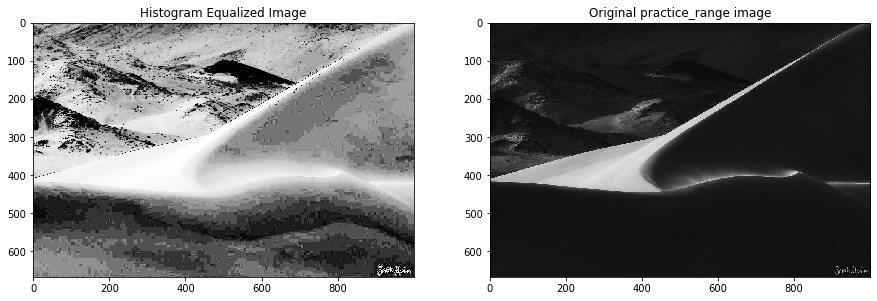

In [4]:
img_hist=cv.imread('../images/practice_range1.jpg',0) #Reading in gray scale with argument as 1
fig1=px.imshow(img_hist,color_continuous_scale='gray',title="Image Hist")
img_equal=histEqualization(img_hist)
fig2=px.imshow(img_equal,color_continuous_scale='gray',title="Image Equalized")

f, axarr = plt.subplots(1,2,figsize=(15,12))
axarr[0].imshow(img_equal,cmap="gray")
axarr[1].imshow(img_hist,cmap="gray")
axarr[0].set_title("Histogram Equalized Image")
axarr[1].set_title("Original practice_range image")

Text(0.5, 1.0, 'Original Hist image')

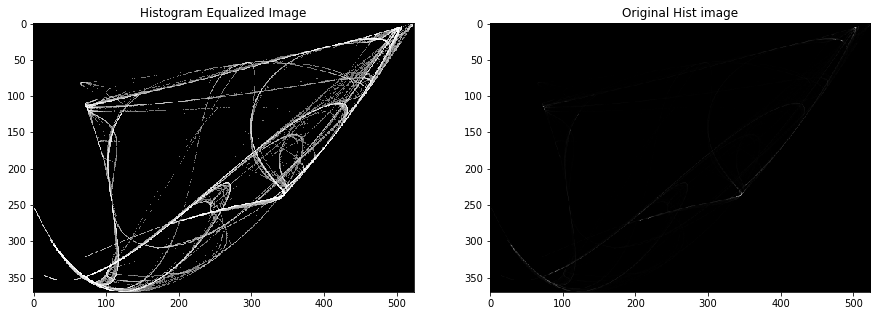

In [5]:
img1_hist=cv.imread('../images/hist.jpg',0) #Reading in gray scale with argument as 1
img1_equal=histEqualization(img1_hist)
f, axarr = plt.subplots(1,2,figsize=(15,12))
axarr[0].imshow(img1_equal,cmap="gray")
axarr[1].imshow(img1_hist,cmap="gray")
axarr[0].set_title("Histogram Equalized Image")
axarr[1].set_title("Original Hist image")

## Part 4 - Decipher the Map (Hist Matching)

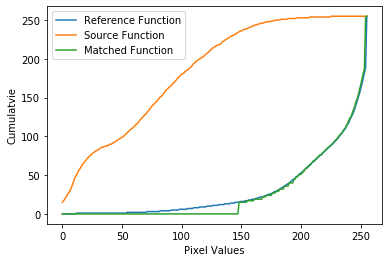

In [6]:
map_img = cv.imread("../images/Map.jpg")
map_img = cv.cvtColor(map_img,cv.COLOR_BGR2GRAY)
sat_img = cv.imread("../images/satellite_img.jpg")
sat_img = cv.cvtColor(sat_img,cv.COLOR_BGR2GRAY)
decipher_img = histMatching(map_img,sat_img)

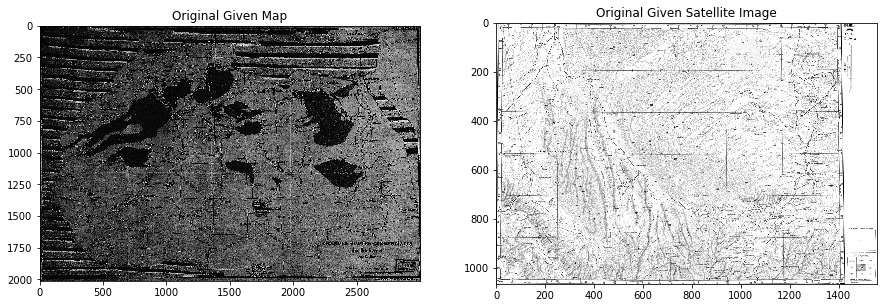

True

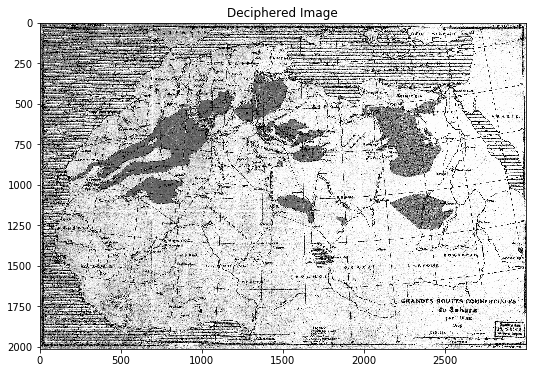

In [7]:
f, axarr = plt.subplots(1,2,figsize=(15,12))
axarr[0].imshow(map_img,cmap="gray")
axarr[1].imshow(sat_img,cmap="gray")
axarr[0].set_title("Original Given Map")
axarr[1].set_title("Original Given Satellite Image")
plt.show()
plt.figure(figsize = (10,6))
plt.imshow(decipher_img,cmap="gray")
plt.title("Deciphered Image")
cv.imwrite('../images/Deciphered_Imag.jpg',decipher_img)

- After writing the deciphered Image as Deciphered_Imag.jpg, we can see that, "Come Here why Vesper Died" is written on the map (from jpg file)
- The person dead is <span style="color:green">Vesper</span>